In [5]:
# imports
from matplotlib import pyplot as plt 
import numpy as np  
import pandas as pd

# todo: add the file to colab

# read the data
dataset = pd.read_csv('training_FinalCountryDatasetCombinedNoMissing.csv') # raw numbers dataset
dataset_2 = pd.read_csv('training_FinalCountryDatasetCombinedNoMissing_proportions.csv') # dataset with cases proportionally scaled (cases/pop * 1000)

# corresponding testing datasets
test_set = pd.read_csv('test_FinalCountryDatasetCombinedNoMissing.csv')
test_set_2 = pd.read_csv('test_FinalCountryDatasetCombinedNoMissing.csv')




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdc32eeb38>]],
      dtype=object)

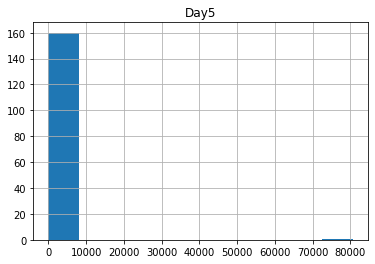

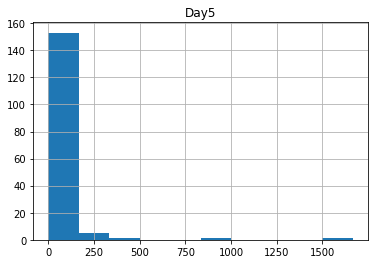

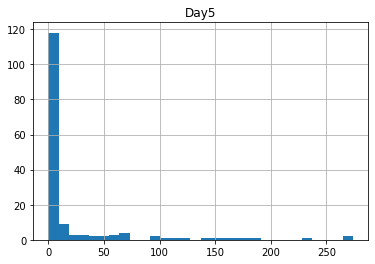

In [6]:
# histgorams to view our distribution
pd.DataFrame.hist(dataset, column = 'Day5', bins = 10)
pd.DataFrame.hist(dataset_2, column = 'Day5', bins = 10)


# a version without the extremely large values to generate better bins. Settle on bins <=20, (20, 100], (100, 200], >200
dataset_2_adjust = dataset_2[dataset_2['Day5'] < 300]
pd.DataFrame.hist(dataset_2_adjust, column = 'Day5', bins = 30)


In [7]:
# view ParsingBins code 

                              country  Surface area (km2)  ...        Day50  bin
0                            Barbados                 431  ...   286.713287    2
1                           Lithuania               65286  ...   465.051903    1
2                              Uganda              241550  ...     2.706297    1
3                              Bhutan               38394  ...     8.663366    1
4                             Ukraine              603500  ...   269.384709    1
..                                ...                 ...  ...          ...  ...
156                             Chile              756102  ...   599.944614    1
157                         Sri Lanka               65610  ...    31.086842    1
158                     Faroe Islands                1393  ...  3816.326531    2
159  Democratic Republic of the Congo             2344858  ...     7.425621    1
160                 Brunei Darussalam                5765  ...   321.678322    3

[161 rows x 63 columns]
[[2

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(1372.9525862068965, 2076.25, 'X[1] <= 0.001\ngini = 0.414\nsamples = 161\nvalue = [120, 26, 9, 6]'),
 Text(821.7672413793103, 1698.75, 'X[26] <= 0.908\ngini = 0.674\nsamples = 36\nvalue = [4, 17, 9, 6]'),
 Text(440.94827586206895, 1321.25, 'X[26] <= 0.781\ngini = 0.722\nsamples = 18\nvalue = [3, 4, 7, 4]'),
 Text(240.51724137931035, 943.75, 'X[23] <= 0.123\ngini = 0.5\nsamples = 6\nvalue = [1, 4, 1, 0]'),
 Text(160.3448275862069, 566.25, 'X[31] <= 0.527\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0]'),
 Text(80.17241379310344, 188.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(240.51724137931035, 188.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(320.6896551724138, 566.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0]'),
 Text(641.3793103448276, 943.75, 'X[29] <= 0.766\ngini = 0.611\nsamples = 12\nvalue = [2, 0, 6, 4]'),
 Text(481.0344827586207, 566.25, 'X[23] <= 0.23\ngini = 0.48\nsamples = 5\nvalue = [2, 0, 0, 3]'),
 Text(400.8620689655172, 188.75, 'g

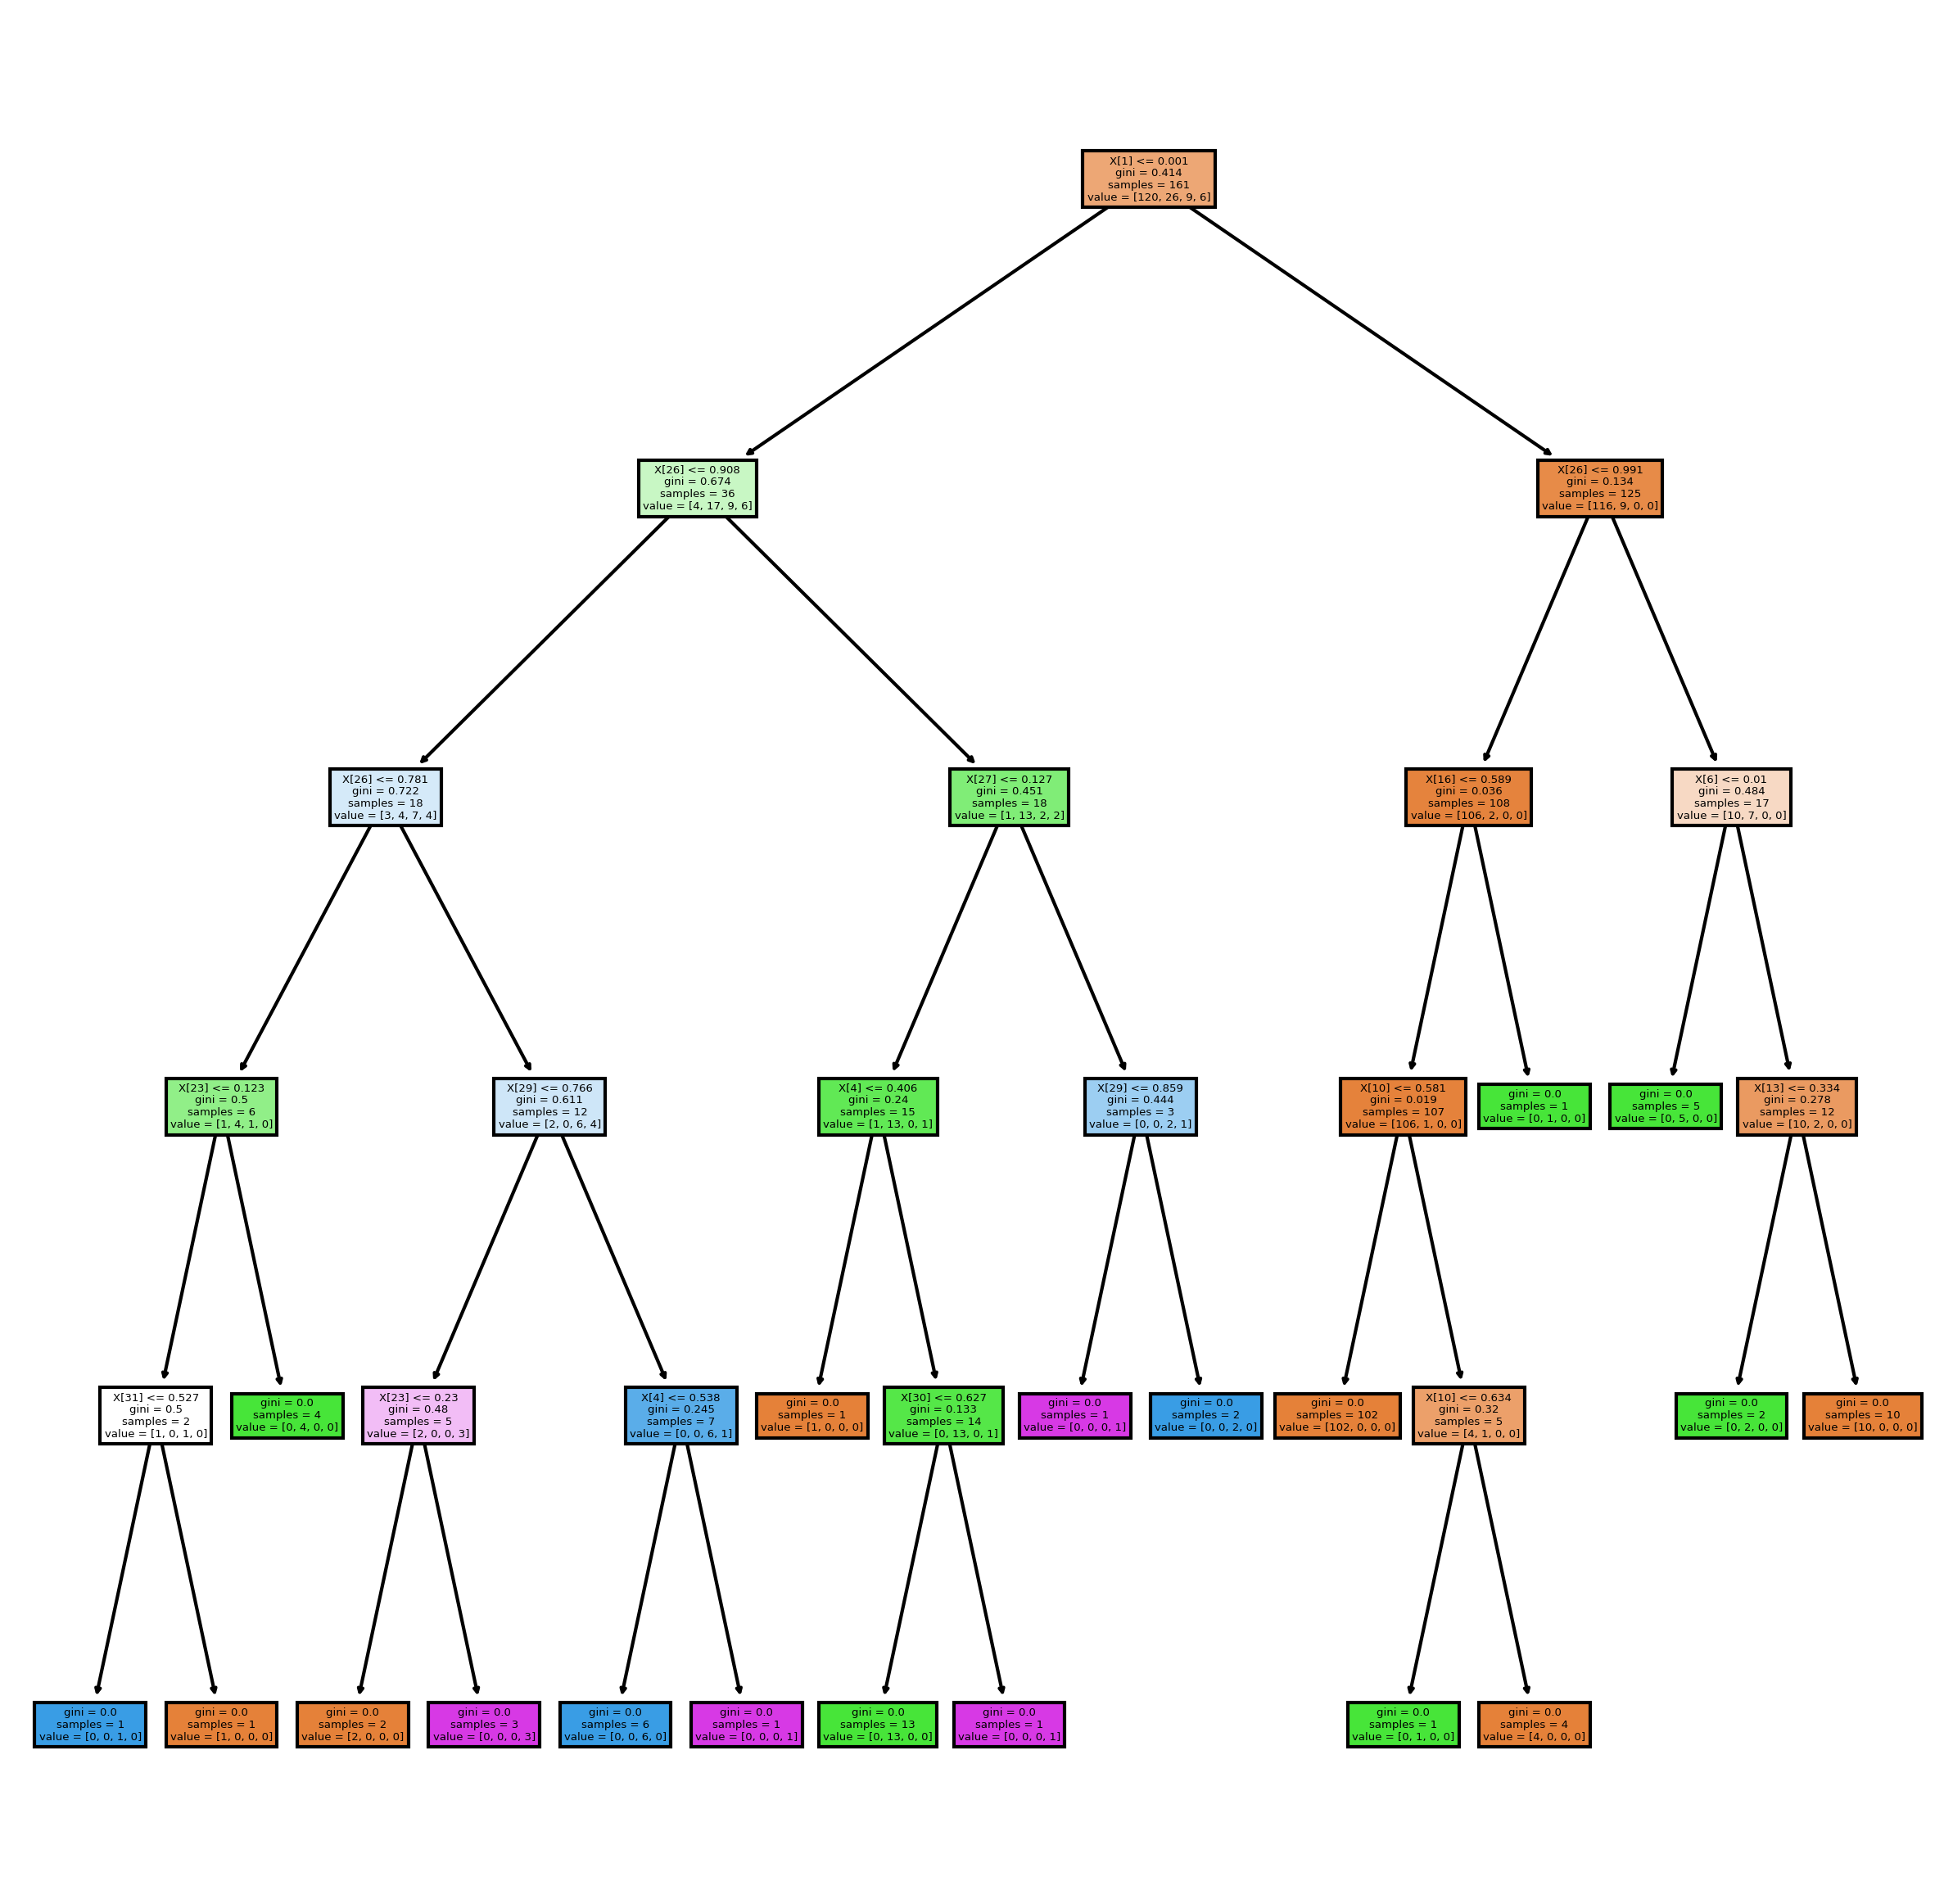

In [8]:
# bins decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt



dataset_bins = pd.read_csv('training_FinalCountryDatasetCombinedNoMissing_proportions_bins.csv')
test_bins = pd.read_csv('test_FinalCountryDatasetCombinedNoMissing_proportions_bins.csv')
print(dataset_bins)

scaler = preprocessing.MinMaxScaler()

X_train = scaler.fit_transform(dataset_bins.drop(['country','Day5', 'Day25', 'Day50', 'bin'], axis = 1))
y_train = dataset_bins['bin']

X_test = scaler.fit_transform(test_bins.drop(['country','Day5', 'Day25', 'Day50', 'bin'], axis = 1))
y_test = test_bins['bin']

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
plot_tree(classifier, filled=True)

